### ASSIGNMENT - 13
### Topic - KNN_zoo_problem
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

__Q Prepare a model for zoo classification using KNN__

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading of data
df = pd.read_csv("zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
#Checking of null values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
# replacing the glass_types from numbers to it's respective classes
df['type'] = df['type'].replace({1:'Mammal',2:'Bird',3:'Reptile',4:'Fish',5:'Amphibian',6:'Bug',7:'Invertebrate'})
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal


In [10]:
#Splitting of data

X = df.iloc[:,1:17]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Text(0, 0.5, 'Error Rate')

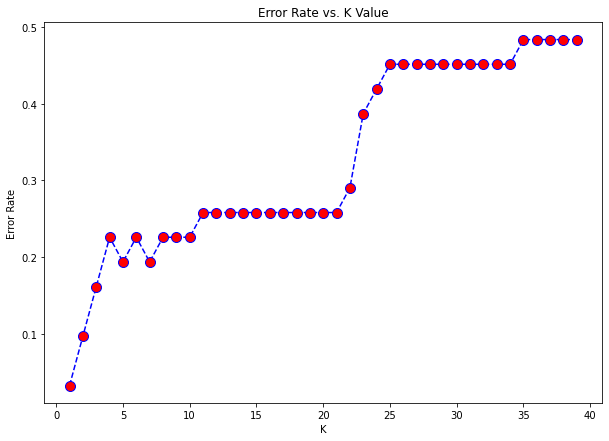

In [11]:
#Error Rates

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test != preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
# From graph it can be seen that k = 1 gives optimum error,hence taking k as 1

k = 1
knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)


In [13]:
# Evaluation of model

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[ 1  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  1  0  0  1]]
              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         1
        Bird       1.00      1.00      1.00         6
         Bug       1.00      1.00      1.00         2
        Fish       0.80      1.00      0.89         4
Invertebrate       1.00      1.00      1.00         4
      Mammal       1.00      1.00      1.00        12
     Reptile       1.00      0.50      0.67         2

    accuracy                           0.97        31
   macro avg       0.97      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31



In [14]:
# actual vs predicted
df_test = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_test

,Actual,Predicted
55,Mammal,Mammal
8,Fish,Fish
78,Bird,Bird
5,Mammal,Mammal
9,Mammal,Mammal
0,Mammal,Mammal
62,Reptile,Reptile
57,Bird,Bird
87,Bird,Bird
19,Mammal,Mammal
